In [82]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Step 1: Import the dataset
# Ensure that categorical variables are imported as characters, not factors
bank_data = pd.read_csv("../data/raw/bank-full.csv", sep=";", dtype={"job": str, "marital": str, "education": str, "default": str, "housing": str, "loan": str, "contact": str, "month": str, "poutcome": str, "y": str})

# Step 2: Take a quick look at the data
# Display the first few rows of the dataset and check variable types
print(bank_data.head())
print(bank_data.dtypes)

# Check for missing values in the entire DataFrame
missing_values = bank_data.isnull().sum()

# check the percentage of missing values in each column:
percentage_missing = (missing_values / len(bank_data)) * 100

# Create a summary DataFrame to display the missing value count and percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})

# Display the summary DataFrame
print(missing_data)

bank_data.info()

print(bank_data["job"].value_counts())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
age           int64
job          object
marital      object
education    object
default      object
balance    

In [83]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


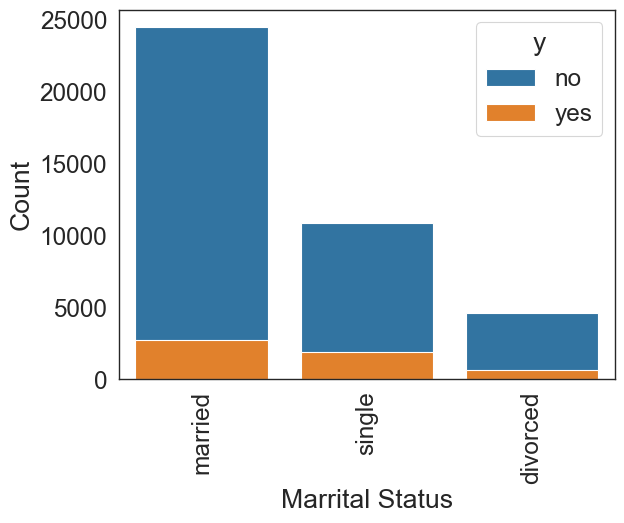

In [84]:
# EDA

#Marrital Status vs TDS

ax = sns.countplot(data = bank_data , x = 'marital', hue ='y', dodge= False)
plt.xlabel('Marrital Status')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

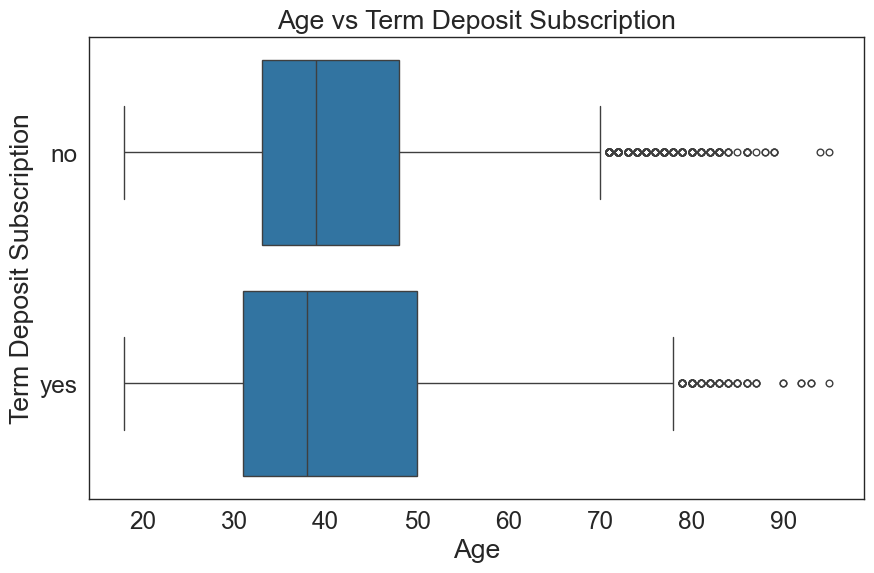

In [85]:
#Age vs TDS
plt.figure(figsize=(10, 6))
sns.boxplot(x='age', y='y', data=bank_data)
plt.title('Age vs Term Deposit Subscription')
plt.xlabel('Age')
plt.ylabel('Term Deposit Subscription')
plt.show()

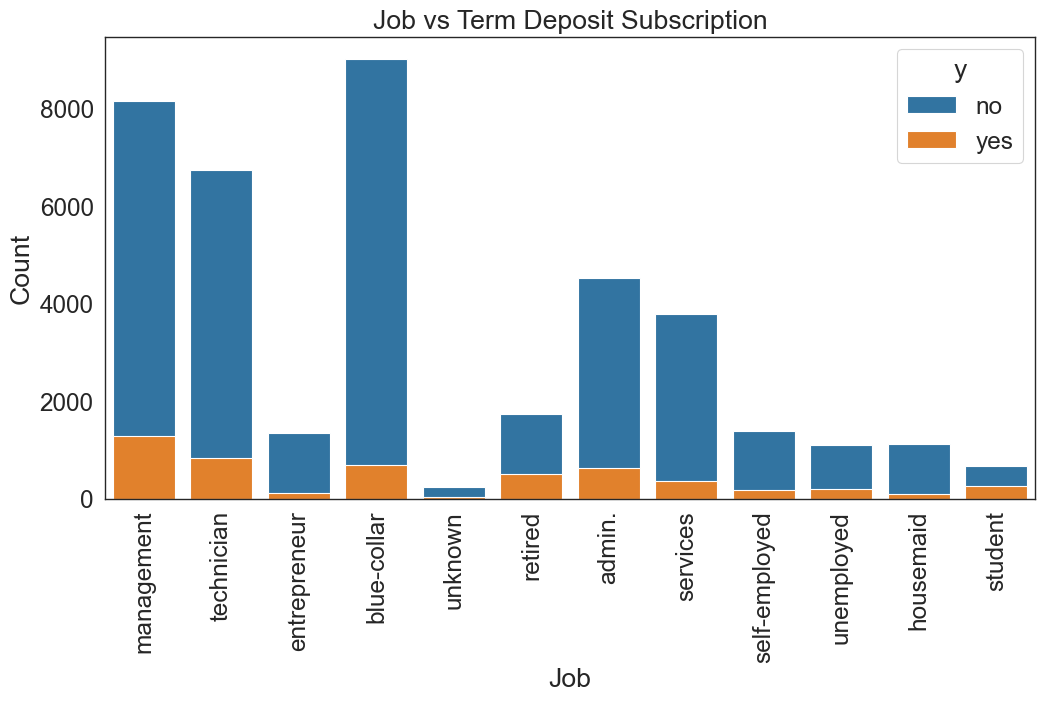

In [86]:
# Job vs TDS
plt.figure(figsize=(12, 6))
sns.countplot(x='job', hue='y', data=bank_data, dodge= False )
plt.title('Job vs Term Deposit Subscription')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

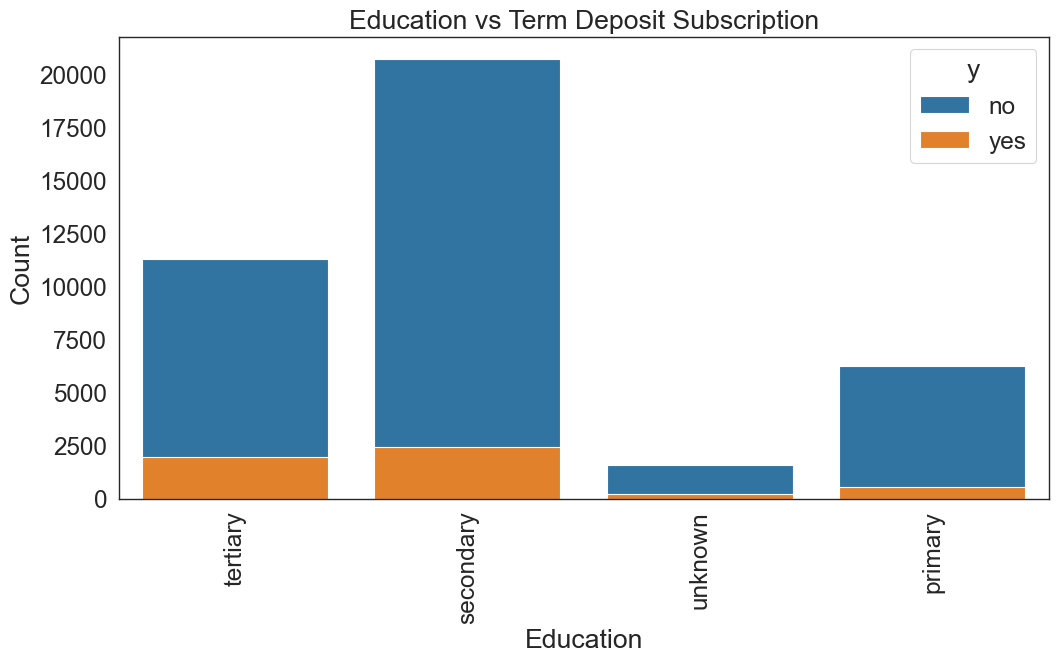

In [87]:

plt.figure(figsize=(12, 6))
sns.countplot(x='education', hue='y', data=bank_data, dodge = False)
plt.title('Education vs Term Deposit Subscription')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()


Proportions of term deposit subscriptions by marital status:
           marital  proportion
marital                       
single      single   14.949179
divorced  divorced   11.945458
married    married   10.123466

Proportions of term deposit subscriptions by education:
           education  proportion
education                       
tertiary    tertiary   15.006390
unknown      unknown   13.570275
secondary  secondary   10.559435
primary      primary    8.626478

Proportions of term deposit subscriptions by job:
                         job  proportion
job                                     
student              student   28.678038
retired              retired   22.791519
unemployed        unemployed   15.502686
management        management   13.755551
admin.                admin.   12.202669
self-employed  self-employed   11.842939
unknown              unknown   11.805556
technician        technician   11.056996
services            services    8.883004
housemaid          housema

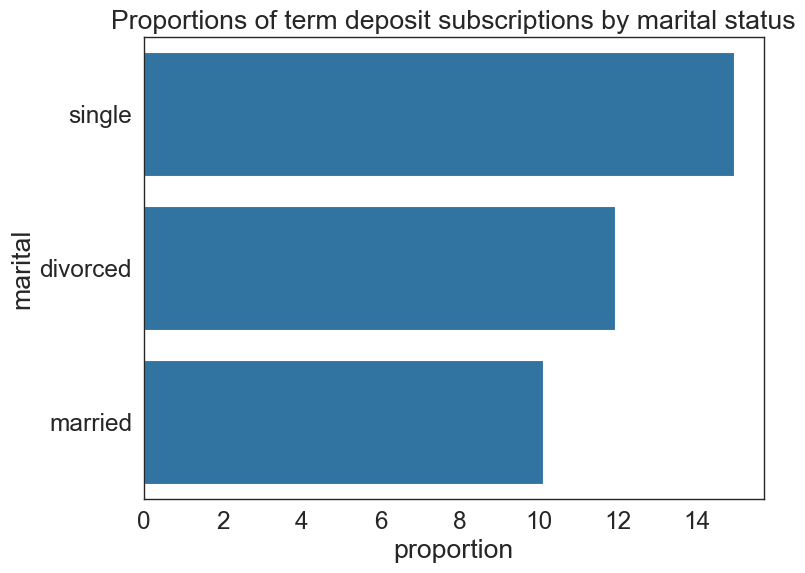

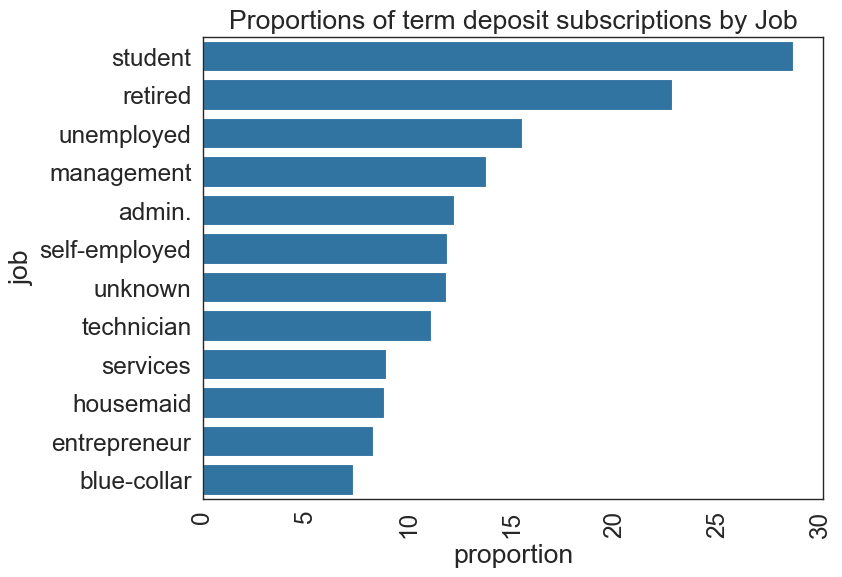

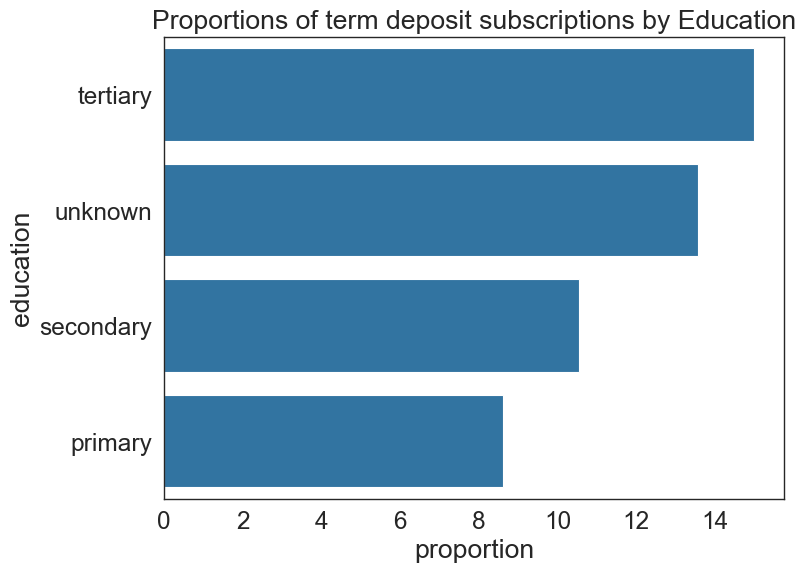

In [88]:
# function to calculate proportions of term deposit suscriptions

def calculate_proportions(feature, df):
    # Group by the feature and target variable ('y'), then count the occurrences
    grouped = df.groupby([feature, 'y']).size()
    # Calculate the proportion of term deposit subscriptions (yes) for each category
    yes_counts = grouped.loc[:, 'yes']
    # Calculate the total counts for each category
    total_counts = grouped.groupby(level=0).sum()

    # Calculate the proportion of term deposit subscriptions (yes) for each category
    proportions = (yes_counts / total_counts)*100

    # Create a new DataFrame with the proportions
    proportions_df = pd.DataFrame({feature: total_counts.index, 'proportion': proportions})
    return proportions_df

# Calculate proportions for each feature
marital_proportions = calculate_proportions('marital', bank_data).sort_values(by = 'proportion', ascending= False)
education_proportions = calculate_proportions('education', bank_data).sort_values(by = 'proportion', ascending= False)
job_proportions = calculate_proportions('job', bank_data).sort_values(by = 'proportion', ascending= False)

# Print the results
print("\nProportions of term deposit subscriptions by marital status:")
print(marital_proportions)
print("\nProportions of term deposit subscriptions by education:")
print(education_proportions)
print("\nProportions of term deposit subscriptions by job:")
print(job_proportions)

plt.figure(figsize = (8,6))
sns.barplot(data = marital_proportions, x = 'proportion', y = 'marital', order= marital_proportions.marital, color= '#1f77b4')
plt.title('Proportions of term deposit subscriptions by marital status')
plt.show()

plt.figure(figsize = (8,6))
sns.barplot(data = job_proportions, x = 'proportion', y = 'job', order = job_proportions.job , color = '#1f77b4')
plt.title('Proportions of term deposit subscriptions by Job')
plt.xticks(rotation = 90)
plt.show()

plt.figure(figsize = (8,6))
sns.barplot(data = education_proportions, x = 'proportion' , y = 'education', order= education_proportions.education, color= '#1f77b4')
plt.title('Proportions of term deposit subscriptions by Education')
plt.show()

Proportions of term deposit subscriptions by age ranges:
          age_range  proportion
age_range                      
<18             <18   58.333333
60+             60+   42.255892
18-30         18-30   16.215446
30-40         30-40   10.244813
50-60         50-60   10.053304
40-50         40-50    9.066643


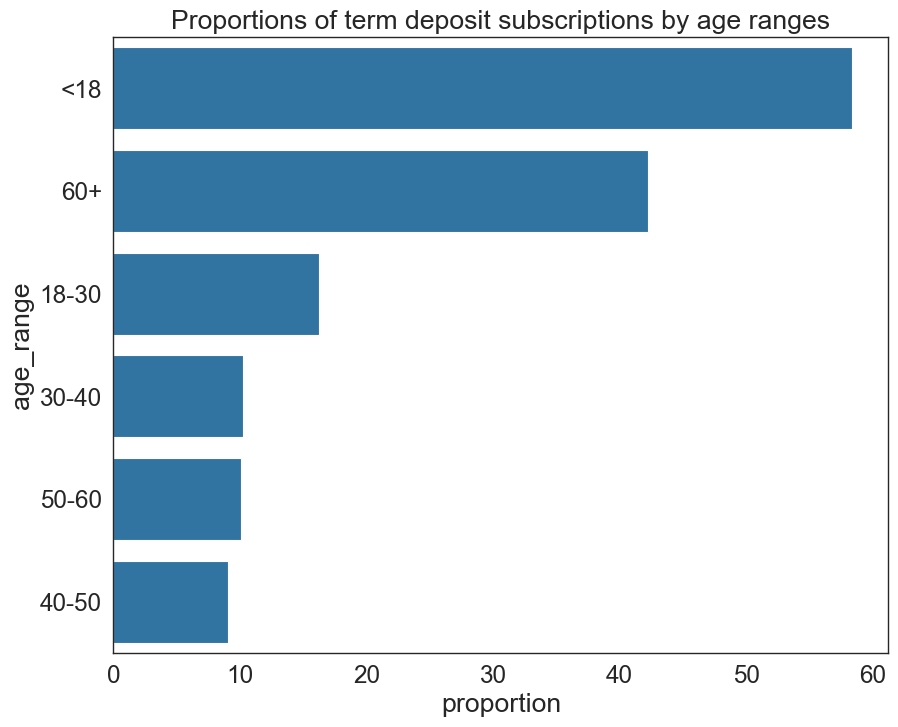

In [89]:
# Define age ranges
bins = [0, 18, 30, 40, 50, 60, 100]
labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60+']

# Create a new column for age ranges
bank_data['age_range'] = pd.cut(bank_data['age'], bins=bins, labels=labels)

# Calculate proportions of term deposit subscriptions for age ranges using calculate proportions function
age_range_proportions = calculate_proportions('age_range',bank_data).sort_values(by = 'proportion', ascending = False)

# Print the results
print("Proportions of term deposit subscriptions by age ranges:")
print(age_range_proportions)

plt.figure(figsize = (10,8))
sns.barplot(data = age_range_proportions, x = 'proportion' , y = 'age_range', order = age_range_proportions.age_range , color= '#1f77b4')
plt.title('Proportions of term deposit subscriptions by age ranges')
plt.show()

<Axes: ylabel='age'>

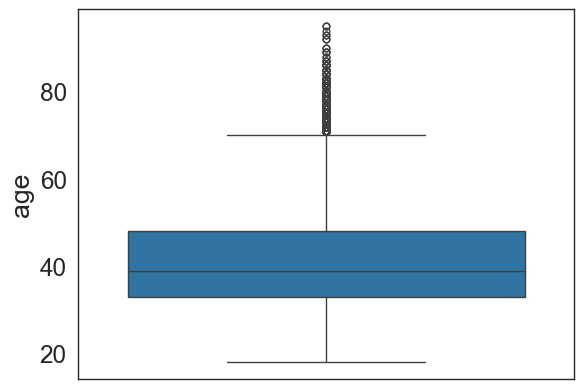

In [90]:
#boxplot for age

import seaborn as sns

sns.boxplot(data = bank_data, y = "age")



<Axes: ylabel='balance'>

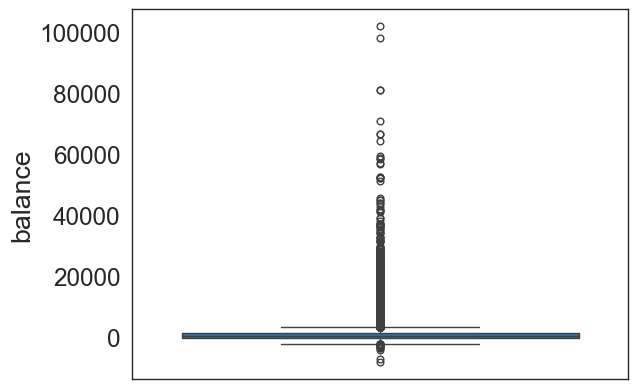

In [91]:
#boxplot for balance

sns.boxplot(data = bank_data, y = "balance")

In [92]:
# Calculate mean, std deviation, q1, q3, and IQR for 'age' and 'balance'

age_mean = bank_data['age'].mean()
age_std = bank_data['age'].std()
age_q1 = bank_data['age'].quantile(0.25)
age_q3 = bank_data['age'].quantile(0.75)
age_iqr = age_q3 - age_q1
print(age_iqr)

balance_mean = bank_data['balance'].mean()
balance_std = bank_data['balance'].std()
balance_q1 = bank_data['balance'].quantile(0.25)
balance_q3 = bank_data['balance'].quantile(0.75)
balance_iqr = balance_q3 - balance_q1
print(balance_iqr)

15.0
1356.0


C:\Users\703302510\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


array([[<Axes: title={'center': 'age'}>]], dtype=object)

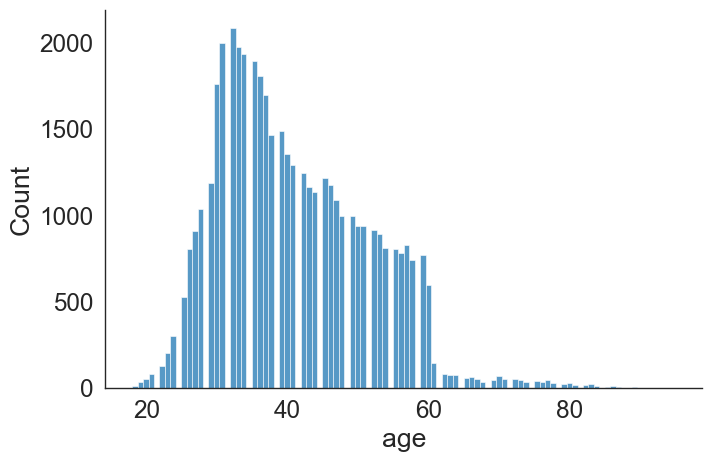

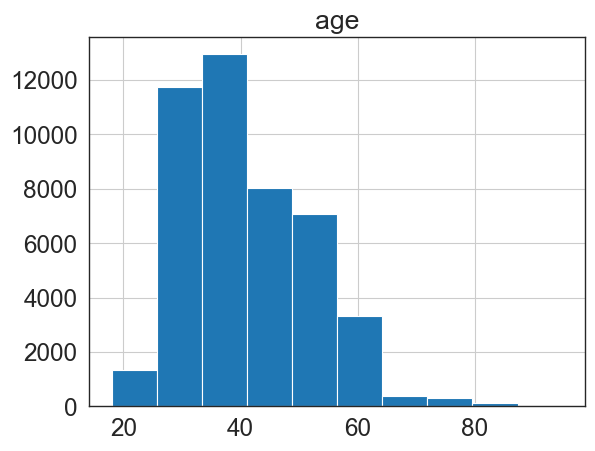

In [93]:
#find distribution of age by dist plot

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=bank_data, x="age", kind="hist", bins = 100, aspect = 1.5)

# plot histogram
bank_data.hist(column='age')

C:\Users\703302510\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


array([[<Axes: title={'center': 'balance'}>]], dtype=object)

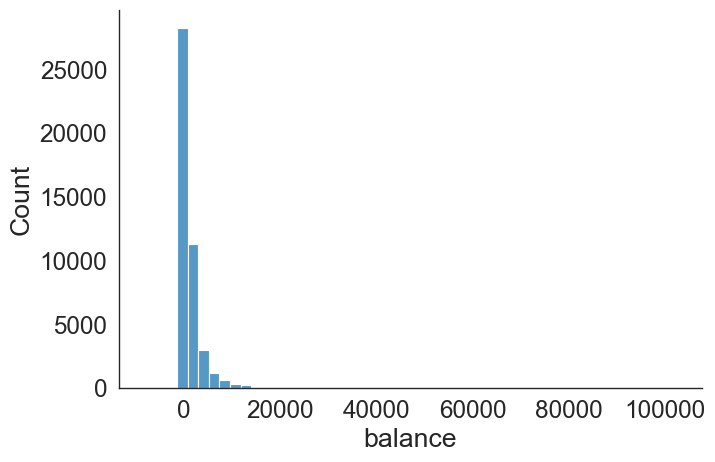

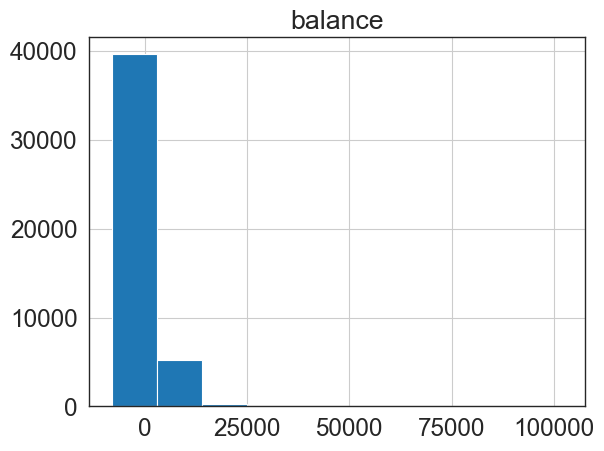

In [94]:
#find distribution of balance by dist plot

sns.set_style('white')
sns.set_context("paper", font_scale = 2)
sns.displot(data=bank_data, x="balance", kind="hist", bins = 50, aspect = 1.5)

# plot histogram
bank_data.hist(column='balance')

In [95]:
def detect_outliers(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3-q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr
    
    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence
    
    #outer fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    
    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(x)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(x)
    return outliers_prob, outliers_poss
        
probable_outliers_tm, possible_outliers_tm = detect_outliers(bank_data, 'age')
print(possible_outliers_tm)

[83, 75, 75, 83, 75, 72, 71, 76, 83, 71, 85, 72, 90, 71, 82, 73, 74, 71, 75, 78, 85, 80, 71, 78, 73, 75, 94, 72, 83, 79, 78, 83, 73, 76, 83, 77, 73, 74, 73, 77, 71, 71, 80, 82, 75, 77, 78, 78, 86, 76, 72, 74, 77, 74, 79, 71, 74, 78, 73, 73, 95, 74, 71, 78, 71, 75, 75, 82, 74, 81, 76, 72, 75, 72, 71, 72, 77, 73, 85, 83, 78, 73, 79, 71, 71, 80, 72, 78, 79, 71, 82, 81, 79, 71, 79, 79, 73, 75, 72, 71, 75, 78, 75, 80, 80, 74, 73, 71, 72, 72, 77, 79, 73, 71, 80, 71, 83, 71, 73, 78, 72, 81, 81, 71, 74, 75, 82, 80, 76, 74, 74, 77, 71, 71, 77, 76, 72, 74, 74, 72, 73, 82, 77, 71, 79, 89, 76, 81, 74, 73, 71, 71, 77, 72, 84, 86, 72, 72, 76, 73, 74, 82, 71, 83, 72, 73, 73, 74, 72, 78, 86, 76, 79, 71, 81, 77, 82, 72, 73, 73, 74, 71, 73, 76, 71, 71, 83, 71, 80, 79, 77, 74, 84, 95, 77, 78, 79, 83, 83, 73, 77, 72, 74, 83, 76, 73, 81, 80, 75, 74, 75, 77, 83, 72, 81, 73, 74, 80, 72, 76, 72, 77, 74, 87, 76, 92, 78, 82, 78, 76, 73, 77, 76, 73, 82, 81, 80, 71, 76, 74, 75, 72, 80, 84, 87, 72, 76, 78, 73, 78,

In [96]:
from scipy.stats import shapiro

def calculate_outlier_limits_normal(data):
    # Perform Shapiro-Wilk test for normality
    _, p_value = shapiro(data)
    
    if p_value > 0.05:  # If p-value > 0.05, assume normal distribution
        mean = data.mean()
        sd = data.std()
        lower_limit = mean - 3 * sd
        upper_limit = mean + 3 * sd
        return lower_limit, upper_limit
    else:
        return None, None  # If not normal, return None for limits

def remove_outliers(df, features):
    df_cleaned = df.copy()  # Create a copy of the original DataFrame
    
    for feature in features:
        # Calculate outlier limits based on normality test
        lower_limit, upper_limit = calculate_outlier_limits_normal(df_cleaned[feature])
        
        if lower_limit is not None and upper_limit is not None:  # If normal distribution
            df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_limit) & (df_cleaned[feature] <= upper_limit)]
        else:  # If not normal distribution, use detect_outliers function
            outliers_prob, outliers_poss = detect_outliers(df_cleaned, feature)
            df_cleaned = df_cleaned[~df_cleaned[feature].isin(outliers_poss)]
    
    return df_cleaned

# Remove outliers by calling the function
features_to_clean = ['age', 'balance']
bank_data_wo_outliers = remove_outliers(bank_data, features_to_clean)
bank_data_wo_outliers.describe()

C:\Users\703302510\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\703302510\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,age,balance,day,duration,campaign,pdays,previous
count,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000,40028.000000
mean,40.279679,630.696637,15.770935,255.625412,2.779529,40.138353,0.562256
std,9.891699,833.029043,8.367605,255.514021,3.122843,101.217659,2.317158
min,18.000000,-1884.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,44.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,344.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,967.000000,21.000000,315.000000,3.000000,-1.000000,0.000000
max,70.000000,3413.000000,31.000000,3881.000000,58.000000,871.000000,275.000000


In [97]:
# Calculate percentage cross table for job and y
job_y_cross_table = pd.crosstab(bank_data_wo_outliers['job'], bank_data_wo_outliers['y'], normalize='index').round(2)

# Calculate percentage cross table for month and y
month_y_cross_table = pd.crosstab(bank_data_wo_outliers['month'], bank_data_wo_outliers['y'], normalize='index').round(2)

print("Percentage Cross Table for job and y:")
print(job_y_cross_table)
print("\nPercentage Cross Table for month and y:")
print(month_y_cross_table)


Percentage Cross Table for job and y:
y                no   yes
job                      
admin.         0.88  0.12
blue-collar    0.93  0.07
entrepreneur   0.92  0.08
housemaid      0.92  0.08
management     0.87  0.13
retired        0.83  0.17
self-employed  0.89  0.11
services       0.91  0.09
student        0.72  0.28
technician     0.90  0.10
unemployed     0.84  0.16
unknown        0.89  0.11

Percentage Cross Table for month and y:
y        no   yes
month            
apr    0.82  0.18
aug    0.90  0.10
dec    0.55  0.45
feb    0.85  0.15
jan    0.91  0.09
jul    0.91  0.09
jun    0.90  0.10
mar    0.48  0.52
may    0.94  0.06
nov    0.90  0.10
oct    0.58  0.42
sep    0.54  0.46


In [98]:
# Select categorical columns
categorical_columns = bank_data_wo_outliers.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

num_categorical_columns = len(categorical_columns)
print("Number of categorical variables:", num_categorical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
Number of categorical variables: 10


In [99]:

def print_value_counts(df, categorical_columns):
    for col in categorical_columns:
        print("Value counts for", col)
        print(df[col].value_counts())
        print("\n")

# Assuming df is the DataFrame and categorical_columns is the list of categorical column names
print_value_counts(bank_data_wo_outliers, categorical_columns)

Value counts for job
blue-collar      8933
management       8113
technician       6832
admin.           4714
services         3839
retired          1572
self-employed    1384
entrepreneur     1333
unemployed       1148
housemaid        1081
student           838
unknown           241
Name: job, dtype: int64


Value counts for marital
married     23871
single      11510
divorced     4647
Name: marital, dtype: int64


Value counts for education
secondary    21072
tertiary     11391
primary       5973
unknown       1592
Name: education, dtype: int64


Value counts for default
no     39227
yes      801
Name: default, dtype: int64


Value counts for housing
yes    22810
no     17218
Name: housing, dtype: int64


Value counts for loan
no     33191
yes     6837
Name: loan, dtype: int64


Value counts for contact
cellular     25879
unknown      11827
telephone     2322
Name: contact, dtype: int64


Value counts for month
may    12703
jul     6408
aug     5505
jun     4640
nov     3036
apr     

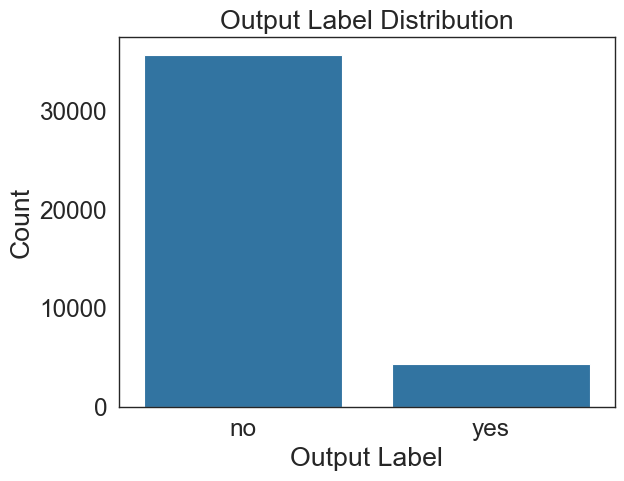

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of output labels
sns.countplot(data=bank_data_wo_outliers, x='y')
plt.xlabel('Output Label')
plt.ylabel('Count')
plt.title('Output Label Distribution')
plt.show()

In [101]:
label_percentages = bank_data_wo_outliers['y'].value_counts(normalize=True) * 100

# Display the percentages
print(label_percentages)

no     89.145098
yes    10.854902
Name: y, dtype: float64


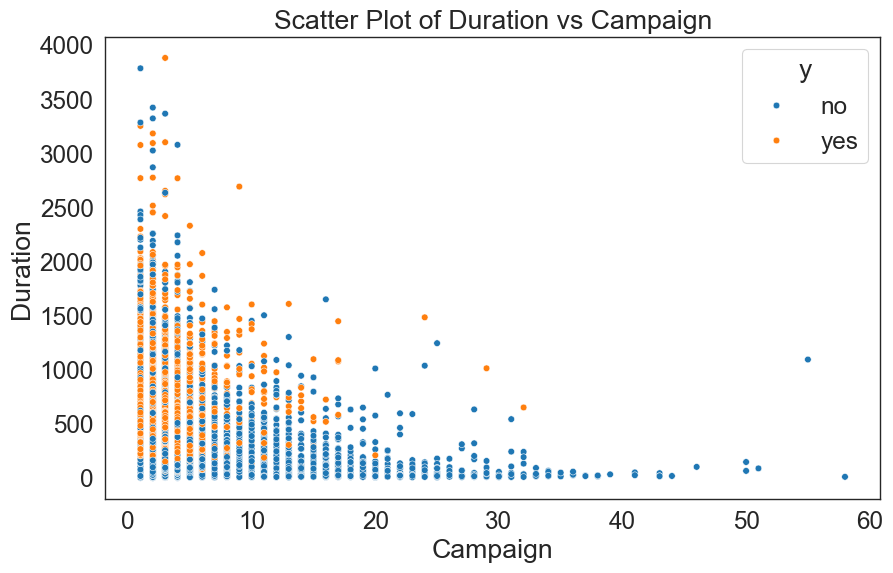

In [102]:
# Campaign vs duration
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=bank_data_wo_outliers, x="campaign", y="duration", hue="y")

# Set plot title and labels
ax.set_title("Scatter Plot of Duration vs Campaign")
ax.set_xlabel("Campaign")
ax.set_ylabel("Duration")

# Display the plot
plt.show()

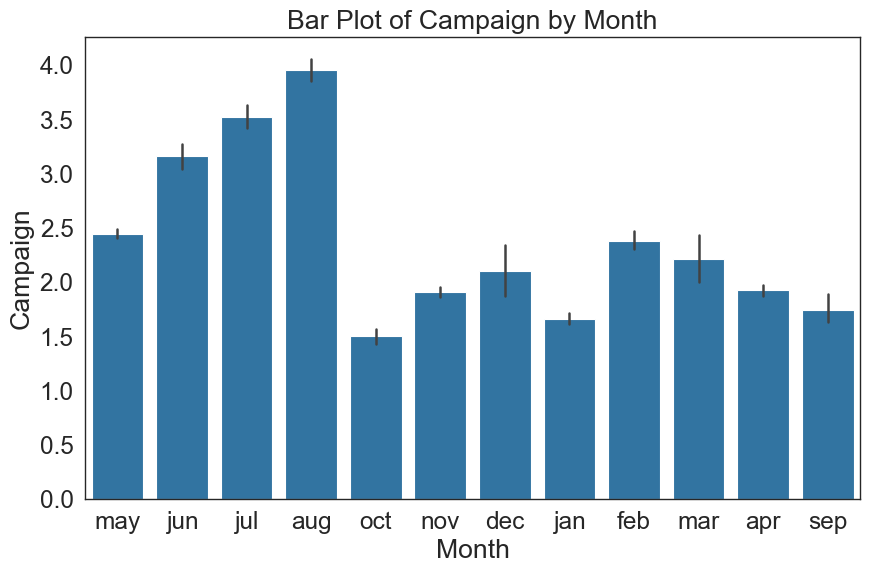

In [103]:
# month vs campaign

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=bank_data_wo_outliers, x='month', y='campaign')

# Set plot title and labels
ax.set_title("Bar Plot of Campaign by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Campaign")

# Display the plot
plt.show()

In [104]:
#Replacing Yes / No with binary values

bank_data_wo_outliers['y'] = bank_data_wo_outliers['y'].apply(lambda x: 1 if x == 'yes' else 0)

bank_data_wo_outliers = bank_data_wo_outliers.drop('age_range', axis = 1)
bank_data_wo_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40028 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40028 non-null  int64 
 1   job        40028 non-null  object
 2   marital    40028 non-null  object
 3   education  40028 non-null  object
 4   default    40028 non-null  object
 5   balance    40028 non-null  int64 
 6   housing    40028 non-null  object
 7   loan       40028 non-null  object
 8   contact    40028 non-null  object
 9   day        40028 non-null  int64 
 10  month      40028 non-null  object
 11  duration   40028 non-null  int64 
 12  campaign   40028 non-null  int64 
 13  pdays      40028 non-null  int64 
 14  previous   40028 non-null  int64 
 15  poutcome   40028 non-null  object
 16  y          40028 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.5+ MB


In [105]:
# One hot encoding for categorical variables
cat_encod_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
data_encoded = pd.get_dummies(bank_data_wo_outliers, columns=cat_encod_cols, drop_first=True)

In [107]:
corr_matrix = data_encoded.corr()
corr_matrix['y'].sort_values(ascending=False)

y                      1.000000
duration               0.400164
poutcome_success       0.304534
month_mar              0.125946
month_sep              0.119924
month_oct              0.118867
pdays                  0.100041
previous               0.089040
balance                0.085657
job_student            0.081359
marital_single         0.072323
month_dec              0.069398
education_tertiary     0.068084
job_retired            0.039428
job_management         0.035229
month_feb              0.031990
poutcome_other         0.029473
job_unemployed         0.029056
education_unknown      0.007064
job_self-employed      0.002536
job_unknown            0.000872
month_aug             -0.004562
month_jun             -0.006188
contact_telephone     -0.006202
job_technician        -0.006533
month_nov             -0.010785
month_jan             -0.012959
job_housemaid         -0.014537
job_entrepreneur      -0.018216
age                   -0.019463
default_yes           -0.020616
job_serv

In [108]:
#Scaling continous variables

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_encoded[['age', 'duration', 'campaign', 'pdays', 'previous']] = scaler.fit_transform(data_encoded[['age', 'duration', 'campaign', 'pdays', 'previous']])

In [111]:
#Feature selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = data_encoded.drop(columns=['y'])
y = data_encoded['y']

logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
rfe = RFE(logreg, n_features_to_select= 19)
rfe.fit(X, y)

selected_features = X.columns[rfe.support_]
print(f'Selected features: {selected_features}')

Selected features: Index(['duration', 'job_housemaid', 'job_student', 'housing_yes', 'loan_yes',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success'],
      dtype='object')


In [115]:
# Fit random forest 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score


X_selected = data_encoded[selected_features]
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train , y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7182
           1       0.51      0.47      0.49       824

    accuracy                           0.90      8006
   macro avg       0.72      0.71      0.72      8006
weighted avg       0.90      0.90      0.90      8006

AUC-ROC: 0.7108022550983716


In [116]:
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X_selected.columns).sort_values(ascending=False)
display(round(feature_importances.head(),2))

duration            0.74
poutcome_success    0.08
housing_yes         0.02
contact_unknown     0.02
month_mar           0.02
dtype: float64

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

y_pred_gbm = gbm.predict(X_test)
print("Gradient Boosting Machine:")
print(classification_report(y_test, y_pred_gbm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_gbm))

Gradient Boosting Machine:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7182
           1       0.68      0.43      0.53       824

    accuracy                           0.92      8006
   macro avg       0.81      0.71      0.74      8006
weighted avg       0.91      0.92      0.91      8006

AUC-ROC: 0.7056067217666604


In [119]:
#Feature importance

importances_gbm = gbm.feature_importances_
feature_importances_gbm = pd.Series(importances_gbm, index=X_selected.columns).sort_values(ascending=False)
print("\nGradient Boosting Machine Feature Importances:")
display(round(feature_importances_gbm.head(),2))


Gradient Boosting Machine Feature Importances:


duration            0.55
poutcome_success    0.21
contact_unknown     0.05
housing_yes         0.04
month_mar           0.04
dtype: float64

In [120]:
# Fit logistic regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

X_selected = data_encoded[selected_features]
y = data_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7182
           1       0.67      0.37      0.48       824

    accuracy                           0.92      8006
   macro avg       0.80      0.67      0.71      8006
weighted avg       0.90      0.92      0.91      8006

AUC-ROC: 0.6735556866816448


In [121]:
#RF oversampled

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled , y_train_resampled)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      7182
           1       0.39      0.67      0.50       824

    accuracy                           0.86      8006
   macro avg       0.68      0.78      0.71      8006
weighted avg       0.90      0.86      0.88      8006

AUC-ROC: 0.7769197129825643


In [122]:
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X_selected.columns).sort_values(ascending=False)
display(round(feature_importances.head(),2))

duration            0.72
poutcome_success    0.06
contact_unknown     0.05
housing_yes         0.03
month_mar           0.02
dtype: float64

In [123]:
#GB oversampled

from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import RandomOverSampler

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train_resampled, y_train_resampled)

y_pred_gbm = gbm.predict(X_test)
print("Gradient Boosting Machine:")
print(classification_report(y_test, y_pred_gbm))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_gbm))

Gradient Boosting Machine:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      7182
           1       0.37      0.87      0.52       824

    accuracy                           0.83      8006
   macro avg       0.68      0.85      0.71      8006
weighted avg       0.92      0.83      0.86      8006

AUC-ROC: 0.8515607046202346


In [124]:
importances_gbm = gbm.feature_importances_
feature_importances_gbm = pd.Series(importances_gbm, index=X_selected.columns).sort_values(ascending=False)
print("\nGradient Boosting Machine Feature Importances:")
display(round(feature_importances_gbm.head(),2))


Gradient Boosting Machine Feature Importances:


duration            0.57
poutcome_success    0.12
contact_unknown     0.11
housing_yes         0.06
month_mar           0.03
dtype: float64

In [125]:
# Best GB model original data


best_gbm = GradientBoostingClassifier(
    subsample=0.5,
    n_estimators=450,
    min_samples_split=15,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=9,
    learning_rate=0.01,random_state=42
)

# Train the model with the best parameters
best_gbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_gbm.predict(X_test)
y_pred_proba = best_gbm.predict_proba(X_test)[:, 1]

# Print the classification report and AUC-ROC score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7182
           1       0.69      0.46      0.55       824

    accuracy                           0.92      8006
   macro avg       0.81      0.72      0.75      8006
weighted avg       0.91      0.92      0.92      8006

AUC-ROC: 0.9323908983624108


In [126]:
importances_gbm_best = best_gbm.feature_importances_
feature_importances_gbm_best = pd.Series(importances_gbm_best, index=X_selected.columns).sort_values(ascending=False)
print("\nGradient Boosting Machine Feature Importances:")
display(round(feature_importances_gbm_best.head(),2))


Gradient Boosting Machine Feature Importances:


duration            0.55
poutcome_success    0.15
contact_unknown     0.04
housing_yes         0.03
month_mar           0.03
dtype: float64

In [127]:
## best GB model Oversampled Data

## Best parameters found:  {'subsample': 1.0, 'n_estimators': 450, 'min_samples_split': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 9, 'learning_rate': 0.2}
best_gbm_o = GradientBoostingClassifier(
    subsample=1.0,
    n_estimators=450,
    min_samples_split=16,
    min_samples_leaf=2,
    max_features='sqrt',
    max_depth=9,
    learning_rate=0.02,random_state=42
)

# Train the model with the best parameters
best_gbm_o.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = best_gbm_o.predict(X_test)
y_pred_proba = best_gbm_o.predict_proba(X_test)[:, 1]

# Print the classification report and AUC-ROC score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_pred_proba))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.84      0.91      7182
           1       0.38      0.86      0.53       824

    accuracy                           0.84      8006
   macro avg       0.68      0.85      0.72      8006
weighted avg       0.92      0.84      0.87      8006

AUC-ROC: 0.9230276338094426


In [128]:
importances_gbm = best_gbm_o.feature_importances_
feature_importances_gbm = pd.Series(importances_gbm, index=X_selected.columns).sort_values(ascending=False)
print("\nGradient Boosting Machine Feature Importances:")
display(round(feature_importances_gbm.head(),2))


Gradient Boosting Machine Feature Importances:


duration            0.60
poutcome_success    0.08
contact_unknown     0.08
housing_yes         0.04
month_mar           0.02
dtype: float64

In [ ]:
# Summary
# Original training data with optimal parameters: AUC-ROC: 0.932 Precision (class 1): 0.69 Recall (class 1): 0.46 F1-score (class 1): 0.55

# Oversampled data with optimal parameters: AUC-ROC: 0.9230 Precision (class 1): 0.98 Recall (class 1): 0.38 F1-score (class 1): 0.53